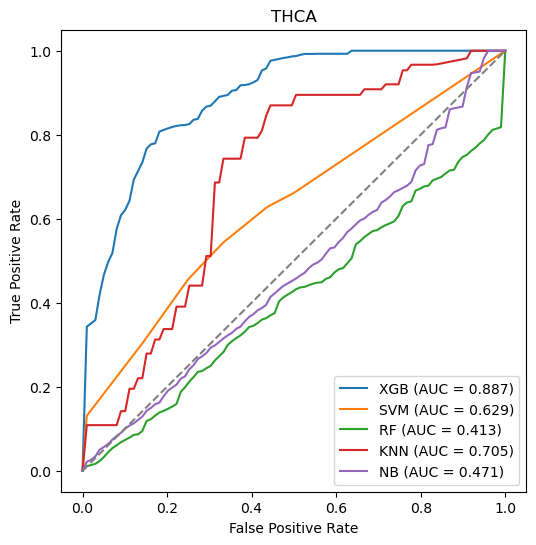

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Replace these with the paths to your Excel files
excel_files = [
    r"C:\Users\aakri\Downloads\xgb-thca-methy-tprs.xlsx",
    r"C:\Users\aakri\Downloads\svm-thca-methy-tprs.xlsx",
    r"C:\Users\aakri\Downloads\rf-thca-methy-tprs.xlsx",
    r"C:\Users\aakri\Downloads\knn-thca-methy-tprs.xlsx",
    r"C:\Users\aakri\Downloads\nb-thca-methy-tprs.xlsx",
]

# Names of the algorithms
algorithm_names = ['XGB','SVM', 'RF', 'KNN', 'NB']

# Initialize lists to store averaged TPRs and AUCs
mean_tprs, aucs = [], []

# Read each Excel file and compute the average TPR
for file_path, name in zip(excel_files, algorithm_names):
    # Read the TPR values from the Excel file
    df = pd.read_excel(file_path, header=None)
    
    # Average the TPR values across all rows (validation sets)
    mean_tpr = df.mean(axis=0).values
    
    # Generate a common FPR array (evenly spaced)
    fpr = np.linspace(0, 1, len(mean_tpr))
    
    # Calculate the AUC
    roc_auc = auc(fpr, mean_tpr)
    
    # Store the averaged TPR and AUC
    mean_tprs.append(mean_tpr)
    aucs.append(roc_auc)

# Plot the ROC curves
plt.figure(figsize=(6,6))
for i in range(len(mean_tprs)):
    plt.plot(fpr, mean_tprs[i], label=f'{algorithm_names[i]} (AUC = {aucs[i]:.3f})')

# Plot the diagonal line for no-skill classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Label the axes and the graph
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('THCA')
plt.legend(loc='lower right')

# Show the plot
plt.show()